## 4.8 Grouping Data & Aggregating Variables

### This script contains the following points:
#### Q1. Import libraries and data


# Q1. Import Libraries & Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 4.1-4.10\02_2024 Instacart Basket Analysis'

In [24]:
#import data - ords_prods_merge.pkl as df_ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped.pkl'))

In [5]:
#check shape
ords_prods_merge.shape

(32404859, 25)

In [7]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [8]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_or_repeat_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency_flag
0,2539329,1,prior,1,2,8,NaN,First Order,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,Repeat Order,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,Repeat Order,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,Repeat Order,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,Repeat Order,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer


# 02 Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

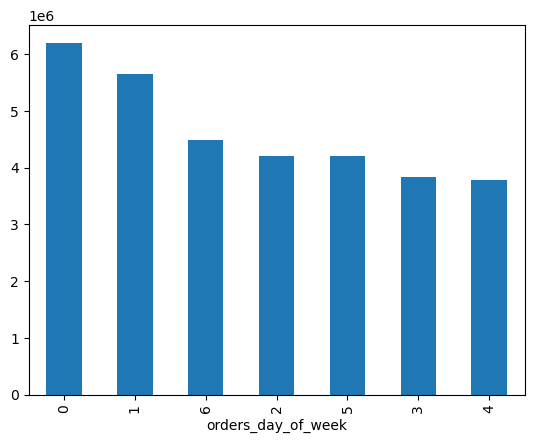

In [9]:
#create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

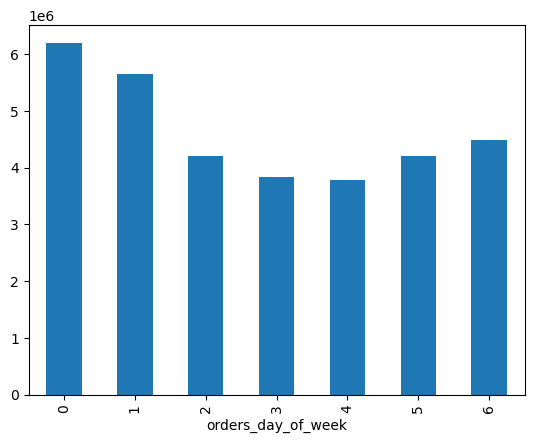

In [10]:
#create a bar chart appearing in indexed order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

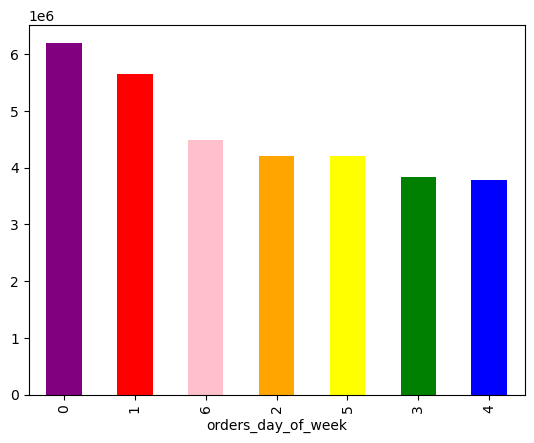

In [11]:
#create/update bar chart with color
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [13]:
#Expoting the color bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

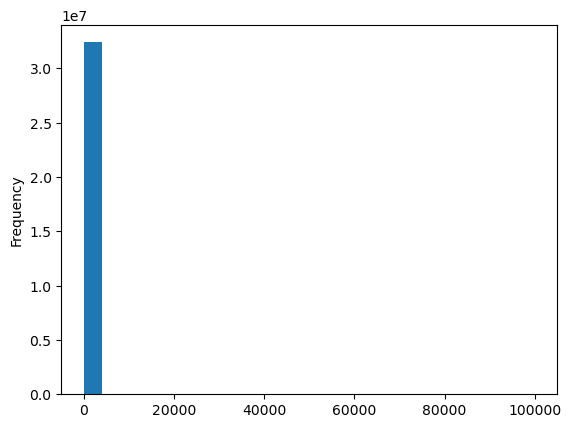

In [14]:
#create a histogram of prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
#check data consistency
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [18]:
ords_prods_merge['prices'].median()

7.4

In [19]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

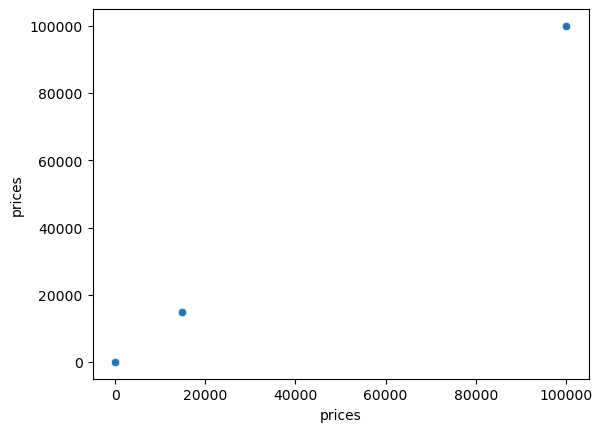

In [20]:
#create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [21]:
#determine and check for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_or_repeat_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,Repeat Order,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High Range Product,Regularly busy,Regularly busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,Repeat Order,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High Range Product,Regularly busy,Regularly busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,Repeat Order,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High Range Product,Regularly busy,Regularly busy,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,Repeat Order,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High Range Product,Busiest day,Busiest days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,Repeat Order,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High Range Product,Regularly busy,Busiest days,Average Orders,16,Regular Customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,Repeat Order,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High Range Product,Busiest day,Busiest days,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,Repeat Order,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,High Range Product,Busiest day,Busiest days,Most Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,Repeat Order,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,High Range Product,Regularly busy,Slowest days,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,Repeat Order,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,High Range Product,Regularly busy,Slowest days,Average Orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular customer


In [22]:
#turn outliers into NaNs (missing values)
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [23]:
ords_prods_merge['prices'].max()

25.0

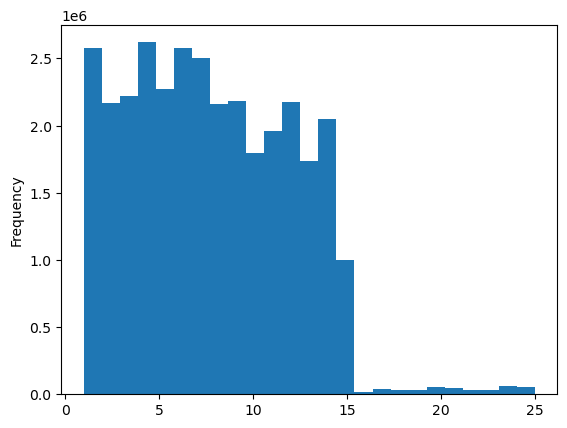

In [28]:
#create a histogram of prices column w/updated data -cleaned outliers
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

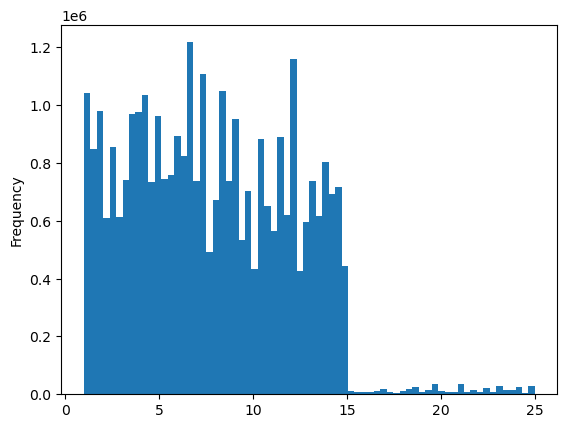

In [29]:
#increase level of granularity in histogram by increasing bins
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [30]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [31]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_prices.png'))

# 4. Creating Line Charts

In [32]:
#Sampling Data
#create a list holiding true/false values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [33]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [34]:
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [35]:
#use len to check sample data/subsetting steps
len (ords_prods_merge)

32404859

In [36]:
len(big) + len(small)

32404859

In [42]:
#reducing sample based on neccessary columns to pull data from
df_2 = small[['orders_day_of_week', 'prices']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


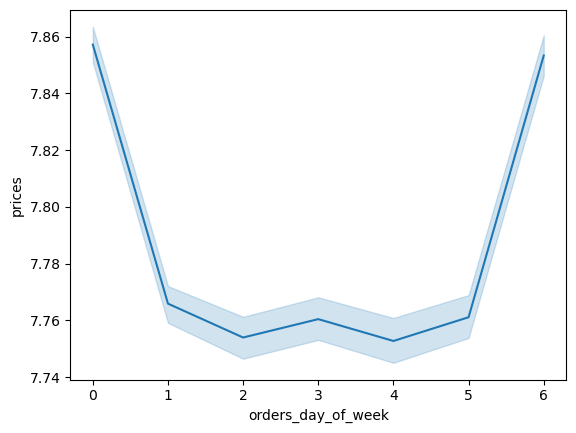

In [43]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [44]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))